In [12]:
from mpl_toolkits.basemap import Basemap
import netCDF4
from pylab import *
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from datetime import datetime
import math as math
import matplotlib.tri as Tri
%matplotlib inline

In [6]:
url='http://localhost:8080/thredds/dodsC/testAll/oedata/1980/agg.ncml'
nc=netCDF4.Dataset(url)
vars=nc.variables
print 'Available variables are: ' +  str(vars.keys())

Available variables are: [u'time', u'x', u'y', u'element', u'adcirc_mesh', u'depth', u'zeta_max', u'time_of_zeta_max', u'wind_max', u'time_of_wind_max', u'pressure_min', u'time_of_pressure_min']


In [97]:
# get model grid
NcVarName='wind_max' 
ele=vars['element']
lon=vars['x']
lat=vars['y']
z=vars[NcVarName]
units=z.units

eled=ele[:]-1
lond=lon[:]
latd=lat[:]
latmn = np.mean(lat)
tri = Tri.Triangulation(lond,latd, triangles=eled)

In [100]:
zd=z[:]
vmin=np.nanmin(zd)
vmax=np.nanmax(zd)
vminmax=math.ceil(10*max(abs(vmin),abs(vmax)))/10
NumLevels=20
print vmin,vmax, vminmax, NumLevels
levels = linspace(0, vminmax, num=NumLevels)
print levels

0.0 39.5894343703 39.6 20
[  0.           2.08421053   4.16842105   6.25263158   8.33684211
  10.42105263  12.50526316  14.58947368  16.67368421  18.75789474
  20.84210526  22.92631579  25.01052632  27.09473684  29.17894737
  31.26315789  33.34736842  35.43157895  37.51578947  39.6       ]


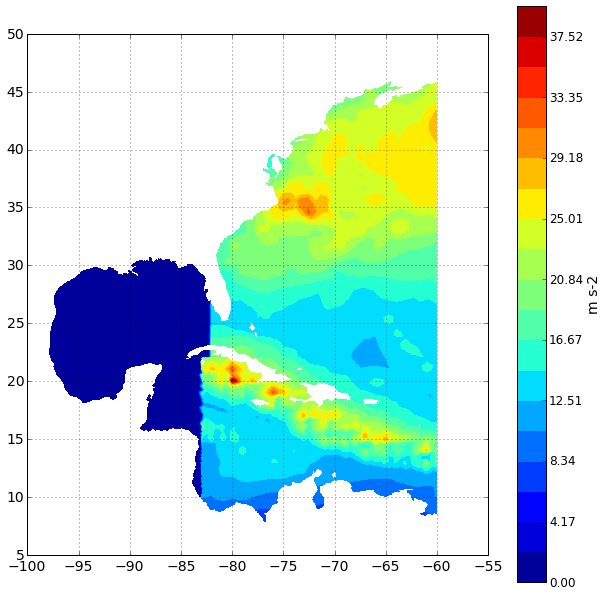

In [101]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_aspect(1.0/np.cos(latmn * np.pi / 180.0))

pc = tricontourf(tri, zd,levels=levels,shading='interp')

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlim((-100,-55))
plt.ylim((5,50))

cbax = fig.add_axes() 
cb = plt.colorbar(pc, cax=cbax,  orientation='vertical')
cb.set_label(units, fontsize=14)
cb.ax.tick_params(axis='both', which='major', labelsize=12)

(array([  9.07800000e+03,   8.50000000e+01,   3.01600000e+03,
          4.87000000e+03,   5.41200000e+03,   8.66400000e+03,
          4.29800000e+03,   1.84000000e+02,   4.00000000e+00,
          2.00000000e+00]),
 array([  0.        ,   3.95894344,   7.91788687,  11.87683031,
         15.83577375,  19.79471719,  23.75366062,  27.71260406,
         31.6715475 ,  35.63049093,  39.58943437]),
 <a list of 10 Patch objects>)

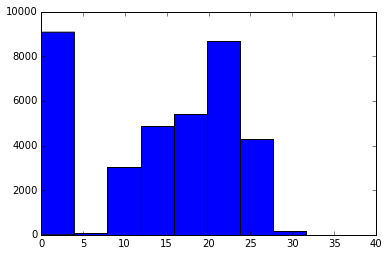

In [102]:
plt.hist(zd)

In [91]:
%pinfo np.nanmin